In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


loc_code = '01'
beta_quantiles = pd.read_csv('./pf_1000_data/datasets/pf_results/' + 
                             loc_code + '_beta_quantiles.csv')
beta_quantiles.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,0,0.095590,0.098991,0.101271,0.104533,0.106504,0.108982,0.111811,0.114228,0.116631,...,0.128777,0.131370,0.133648,0.137011,0.140045,0.142199,0.145521,0.150463,0.153244,0.157791
1,1,0.093416,0.095383,0.098617,0.102757,0.106094,0.109305,0.112274,0.114920,0.117002,...,0.130359,0.133042,0.135833,0.139047,0.141625,0.144548,0.148505,0.153214,0.159536,0.167356
2,2,0.093379,0.096360,0.098732,0.104094,0.108061,0.111185,0.114646,0.116900,0.120298,...,0.132313,0.134911,0.138547,0.141546,0.145335,0.148621,0.152823,0.157987,0.164263,0.170698
3,3,0.090493,0.092923,0.096196,0.100529,0.104152,0.107231,0.109864,0.112688,0.115141,...,0.129085,0.131682,0.135117,0.137931,0.140746,0.144799,0.149599,0.157811,0.165534,0.172909
4,4,0.087021,0.090553,0.094135,0.097360,0.101185,0.104069,0.106881,0.108678,0.111667,...,0.123369,0.125784,0.128412,0.131884,0.135083,0.139217,0.144726,0.154257,0.160733,0.165887


In [10]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('./pf_1000_data/datasets/pf_results/' + 
                             loc_code + '_beta_quantiles.csv', delimiter=','
                                                                         '',
                  usecols=range(1,24), skiprows=1)
cleaned_data = np.delete(data, 0, 1)
print(cleaned_data)

[[0.09899089 0.10127115 0.10453321 ... 0.15046286 0.15324409 0.15779127]
 [0.09538331 0.09861673 0.10275727 ... 0.15321392 0.15953627 0.16735577]
 [0.09635995 0.09873156 0.10409356 ... 0.1579873  0.16426332 0.17069794]
 ...
 [0.04915411 0.05319668 0.05697508 ... 0.11792247 0.12852275 0.13895927]
 [0.04803107 0.05119698 0.05551227 ... 0.1124934  0.1183886  0.13028638]
 [0.04702132 0.04954987 0.05557524 ... 0.11320725 0.12049623 0.13244473]]


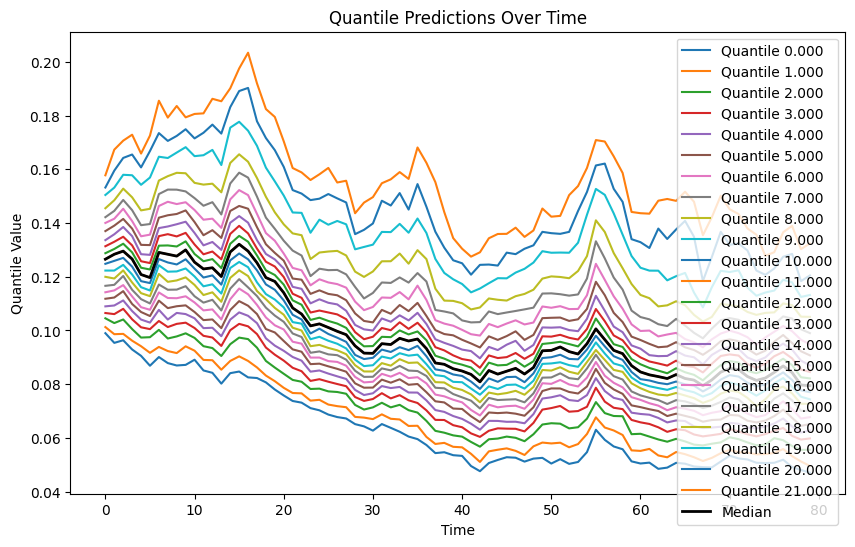

In [11]:

# Define the quantiles
quantiles = np.linspace(0, 22, 23)

# Plotting
plt.figure(figsize=(10, 6))

# Plot each quantile
for i in range(cleaned_data.shape[1]):
    plt.plot(cleaned_data[:, i], label=f'Quantile {quantiles[i]:.3f}')

# Highlight the median quantile (assuming it's the middle one)
median_index = len(quantiles) // 2
plt.plot(cleaned_data[:, median_index], color='black', linewidth=2, 
         label='Median')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Quantile Value')
plt.title('Quantile Predictions Over Time')
plt.legend()
plt.show()


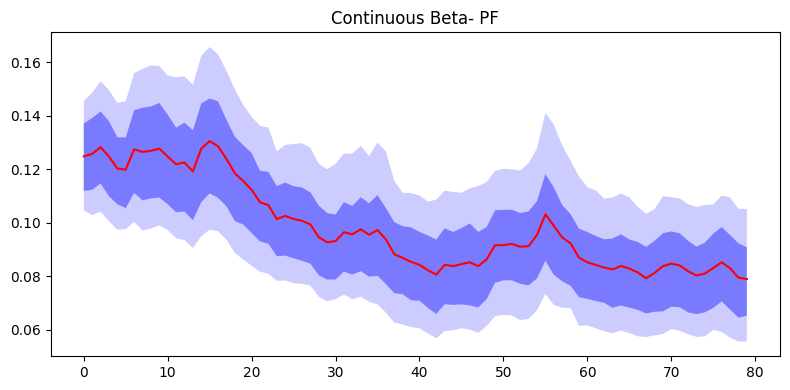

In [18]:
beta_quantiles = pd.read_csv('./pf_1000_data/datasets/pf_results/' + 
                             loc_code + '_beta_quantiles.csv').to_numpy()
beta_quantiles = np.delete(beta_quantiles,0,1)

pf_beta = pd.read_csv('./pf_1000_data/datasets/pf_results/' + 
                       loc_code + '_average_beta.csv').to_numpy()
pf_beta = np.delete(pf_beta,0,1)

plt.figure(figsize=(8,4))
plt.title("Continuous Beta- PF")
t=80

plt.fill_between(np.arange(0,t), beta_quantiles[:,3], beta_quantiles[0:t,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), beta_quantiles[:,6], beta_quantiles[0:t,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.plot(pf_beta[0:t],color="red",zorder=12)
plt.tight_layout()
plt.savefig('Beta.png')
plt.show()